# GRU Model

Two-layer GRU trained per sensor to predict water_temp, pH, EC, and DO
six time steps (30 mins) ahead. Data is pre-cleaned with outlier clipping (see EDA notebook).

In [290]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, Dropout, GRU, Input
from keras.utils import pad_sequences
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Imports & Data

In [291]:
df = pd.read_csv('../data/asfp_cleaned_features.csv')
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.values}")

Shape: (23201, 15)
Columns: ['time' 'sensor' 'water_temp' 'ph' 'ec' 'do' 'dt_seconds' 'segment' 'hour'
 'dayofweek' 'month' 'water_temp_roll1h_mean' 'ph_roll1h_mean'
 'ec_roll1h_mean' 'do_roll1h_mean']


## Hyperparameters

Sequence length, prediction horizon, layer sizes, dropout, and learning rate.
`input_features` feed the model; `output_features` are the prediction targets.

In [292]:
#########################
#### Hyperparameters ####
#########################

feature_cols = ['water_temp', 'ph', 'ec', 'do', 'dt_seconds', 'segment', 'hour', 'dayofweek', 'month', 'water_temp_roll1h_mean', 'ph_roll1h_mean', 'ec_roll1h_mean', 'do_roll1h_mean']
input_features = ['water_temp', 'ph', 'ec', 'do','dt_seconds','hour', 'month', 'dayofweek']
output_features = ['water_temp','ph', 'ec','do']

n_inputs = len(input_features)
n_outputs = len(output_features)

layer_1_units = 128
layer_2_units = 64

dropout_rate = 0.2
learning_rate = 0.01

batch_size = 500
validation_split = 0.05

seq_length = 10
pred_horizon = 12

units = {'water_temp': '\u00b0C', 'ph': 'pH', 'ec': '\u00b5S/cm', 'do': 'mg/L'}

## Train & Evaluate (per sensor)

For each sensor:
1. 80/20 temporal split (no shuffle)
2. MinMax scaling fit on train only
3. Sliding-window sequence generation
4. Train with early stopping (patience=10, restore best weights)
5. Evaluate on test set & report per-feature RMSE in original units


  SENSOR 1



Model: "gru_sensor1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_196 (GRU)                   │ (None, 10, 128)        │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_196 (Dropout)           │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_197 (GRU)                   │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_197 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,500 (353.52 KB)

 Trainable params: 90,500 (353.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100

Epoch 1: val_loss improved from None to 0.02142, saving model to ../models/gru-sensor-1.keras
18/18 - 2s - 95ms/step - loss: 0.0666 - mse: 0.0666 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 2/100

Epoch 2: val_loss improved from 0.02142 to 0.01160, saving model to ../models/gru-sensor-1.keras
18/18 - 0s - 27ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3/100

Epoch 3: val_loss improved from 0.01160 to 0.01071, saving model to ../models/gru-sensor-1.keras
18/18 - 1s - 28ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 4/100

Epoch 4: val_loss improved from 0.01071 to 0.00986, saving model to ../models/gru-sensor-1.keras
18/18 - 0s - 27ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 5/100

Epoch 5: val_loss did not improve from 0.00986
18/18 - 1s - 30ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 6/100

Epoch 6: val_loss improved from 0.00986 to 0.

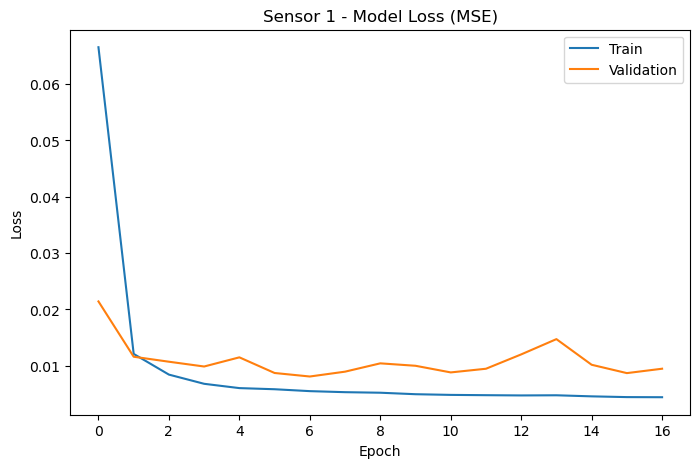

71/71 - 0s - 1ms/step - loss: 0.0089 - mse: 0.0089

Sensor 1 - Overall Test MSE (scaled): 0.008896
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sensor 1 - Per-feature MSE (original units):
  water_temp: MSE = 0.2531 °C², RMSE = 0.5031 °C
  ph: MSE = 0.1193 pH², RMSE = 0.3453 pH
  ec: MSE = 0.1705 µS/cm², RMSE = 0.4129 µS/cm
  do: MSE = 2.2504 mg/L², RMSE = 1.5001 mg/L


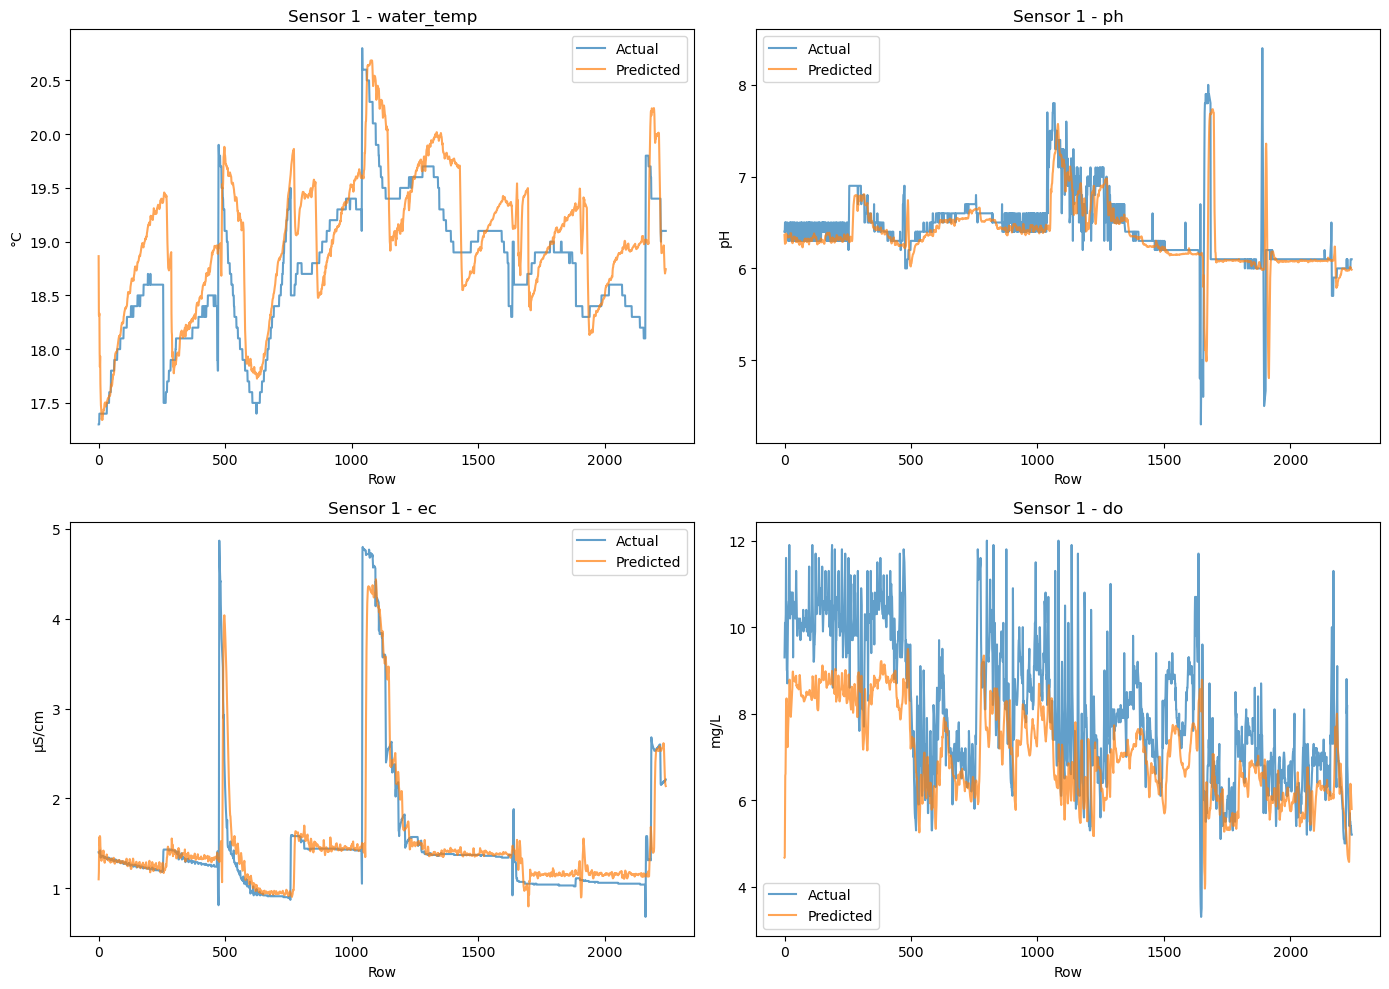


  SENSOR 2



Model: "gru_sensor2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_198 (GRU)                   │ (None, 10, 128)        │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_198 (Dropout)           │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_199 (GRU)                   │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_199 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,500 (353.52 KB)

 Trainable params: 90,500 (353.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100

Epoch 1: val_loss improved from None to 0.01355, saving model to ../models/gru-sensor-2.keras
19/19 - 2s - 89ms/step - loss: 0.0650 - mse: 0.0650 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2/100

Epoch 2: val_loss improved from 0.01355 to 0.00410, saving model to ../models/gru-sensor-2.keras
19/19 - 1s - 28ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/100

Epoch 3: val_loss improved from 0.00410 to 0.00407, saving model to ../models/gru-sensor-2.keras
19/19 - 1s - 30ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/100

Epoch 4: val_loss improved from 0.00407 to 0.00386, saving model to ../models/gru-sensor-2.keras
19/19 - 1s - 28ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/100

Epoch 5: val_loss improved from 0.00386 to 0.00364, saving model to ../models/gru-sensor-2.keras
19/19 - 1s - 28ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/

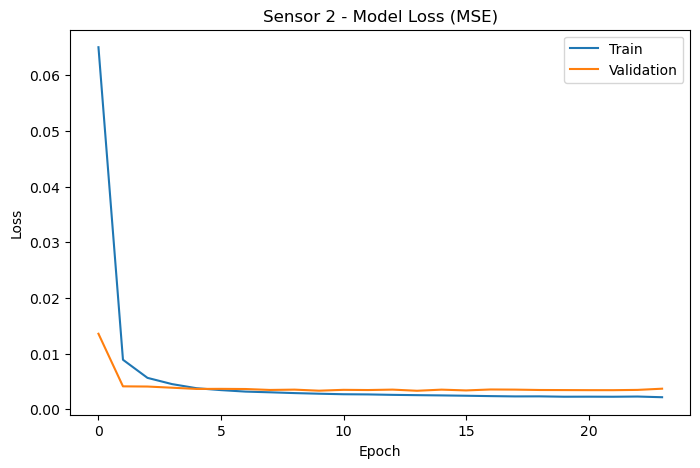

75/75 - 0s - 1ms/step - loss: 0.0010 - mse: 0.0010

Sensor 2 - Overall Test MSE (scaled): 0.001017
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sensor 2 - Per-feature MSE (original units):
  water_temp: MSE = 0.0417 °C², RMSE = 0.2041 °C
  ph: MSE = 0.0079 pH², RMSE = 0.0891 pH
  ec: MSE = 0.0334 µS/cm², RMSE = 0.1828 µS/cm
  do: MSE = 0.0186 mg/L², RMSE = 0.1364 mg/L


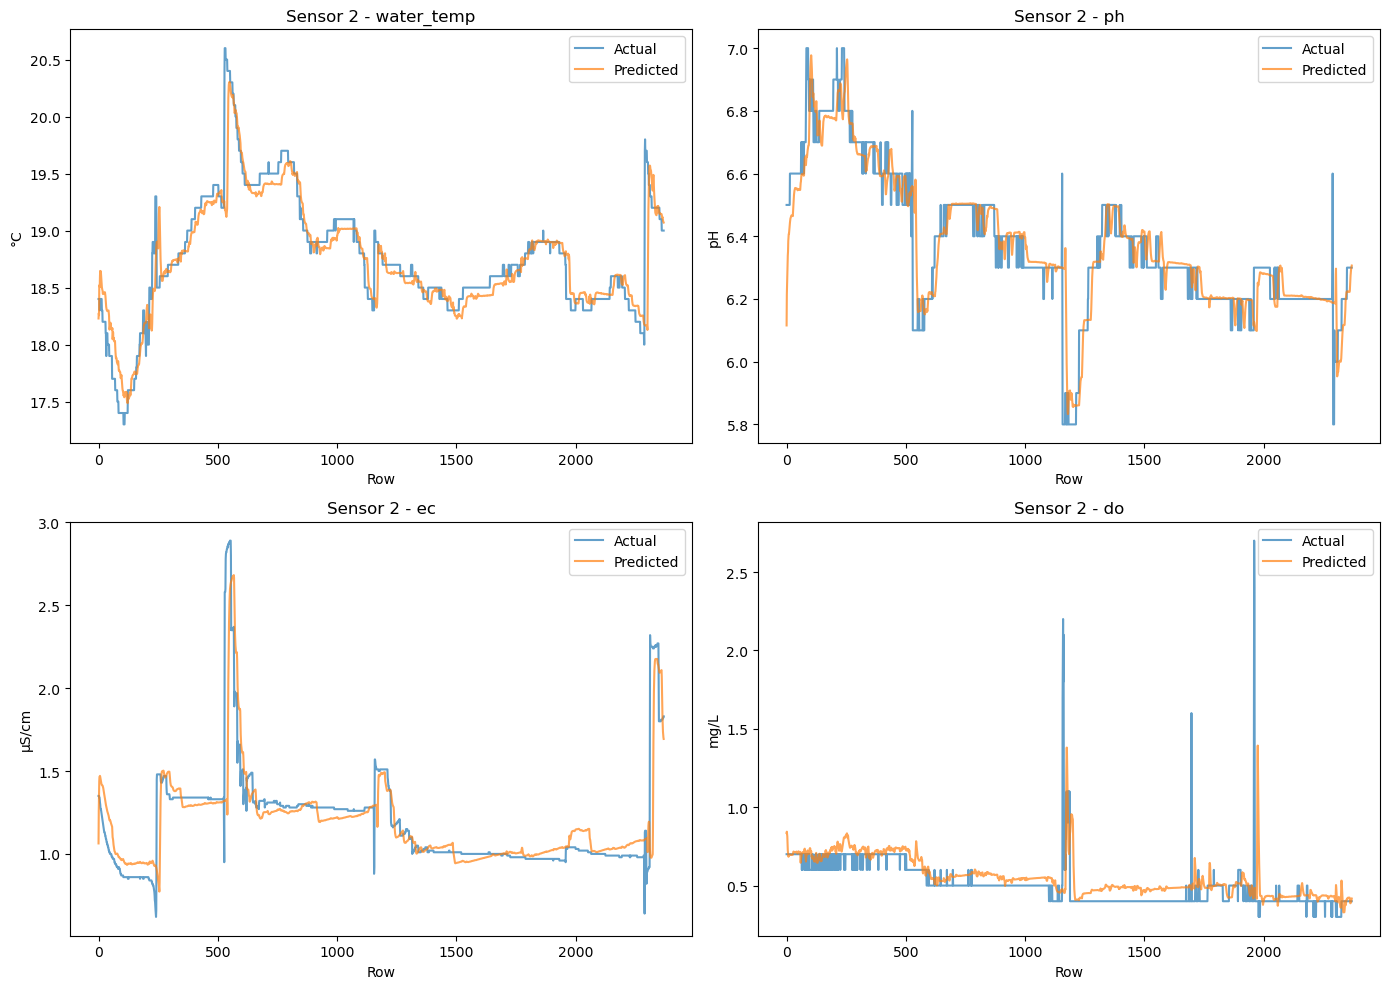

In [293]:
sensor_results = {}

for sensor_id in [1, 2]:
    print(f"\n{'='*60}")
    print(f"  SENSOR {sensor_id}")
    print(f"{'='*60}\n")

    ######################
    #### Split Data #####
    ######################
    df_sub = df[df['sensor'] == sensor_id]
    X_train, X_test = train_test_split(df_sub, test_size=0.2, shuffle=False)
    df_train = X_train.reset_index()
    df_test = X_test.reset_index()

    ############################
    #### Scale Features ########
    ############################
    output_scaler = MinMaxScaler()
    output_scaler.fit(df_train[output_features])

    # Keep unscaled test outputs for baseline comparison
    test_raw_outputs = df_test[output_features].values.copy()

    scaler = MinMaxScaler()
    df_train[feature_cols] = scaler.fit_transform(df_train[feature_cols])
    df_test[feature_cols] = scaler.transform(df_test[feature_cols])

    #########################
    #### Build Sequences ####
    #########################
    seq_arrays = []
    seq_labels = []
    for i in range(len(df_train) - seq_length - pred_horizon):
        seq_arrays.append(df_train[input_features].iloc[i:i+seq_length].values)
        seq_labels.append(df_train[output_features].iloc[i+seq_length+pred_horizon].values)
    seq_arrays = np.array(seq_arrays)
    seq_labels = np.array(seq_labels)

    ######################
    #### Build Model ####
    ######################
    model = Sequential(name=f'gru_sensor{sensor_id}')
    model.add(Input(shape=(seq_length, n_inputs)))
    model.add(GRU(units=layer_1_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=layer_2_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=n_outputs))
    model.compile(optimizer=Adam(learning_rate), loss='mse', metrics=['mse'])
    model.summary()

    ######################
    #### Train Model ####
    ######################
    checkpoint_path = f'../models/gru-sensor-{sensor_id}.keras'

    history = model.fit(
        seq_arrays, seq_labels,
        epochs=100, batch_size=batch_size, validation_split=validation_split, verbose=2,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True),
            ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
        ]
    )

    print(f'Best model saved to {checkpoint_path}')

    # Plot training loss
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Sensor {sensor_id} - Model Loss (MSE)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    ########################
    #### Validate Model ####
    ########################
    test_arrays = []
    test_labels = []
    for i in range(2, len(df_test) - pred_horizon):
        start_idx = max(0, i - seq_length)
        test_arrays.append(df_test[input_features].iloc[start_idx:i].values)
        test_labels.append(df_test[output_features].iloc[i + pred_horizon].values)
    test_arrays = pad_sequences(test_arrays, maxlen=seq_length, dtype='float32', padding='pre')
    test_labels = np.array(test_labels, dtype=np.float32)

    ########################
    #### Evaluate & Plot ####
    ########################
    scores_test = model.evaluate(test_arrays, test_labels, verbose=2)
    print(f'\nSensor {sensor_id} - Overall Test MSE (scaled): {scores_test[1]:.6f}')

    y_pred_test = model.predict(test_arrays)
    y_true_test = test_labels

    y_pred_orig = output_scaler.inverse_transform(y_pred_test)
    y_true_orig = output_scaler.inverse_transform(y_true_test)

    print(f'\nSensor {sensor_id} - Per-feature MSE (original units):')
    for i, feat in enumerate(output_features):
        mse = np.nanmean((y_true_orig[:, i] - y_pred_orig[:, i]) ** 2)
        rmse = np.sqrt(mse)
        print(f'  {feat}: MSE = {mse:.4f} {units[feat]}\u00b2, RMSE = {rmse:.4f} {units[feat]}')

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    for i, feat in enumerate(output_features):
        ax = axes[i]
        ax.plot(y_true_orig[:, i], label='Actual', alpha=0.7)
        ax.plot(y_pred_orig[:, i], label='Predicted', alpha=0.7)
        ax.set_title(f'Sensor {sensor_id} - {feat}')
        ax.set_xlabel('Row')
        ax.set_ylabel(f'{units[feat]}')
        ax.legend()
    plt.tight_layout()
    plt.show()

    # Build persistence baseline: predict value at time t for target at t + pred_horizon
    # Aligned to same test indices used for GRU evaluation
    baseline_pred = []
    baseline_true = []
    for i in range(2, len(test_raw_outputs) - pred_horizon):
        baseline_pred.append(test_raw_outputs[i])
        baseline_true.append(test_raw_outputs[i + pred_horizon])
    baseline_pred = np.array(baseline_pred)
    baseline_true = np.array(baseline_true)

    # Store for downstream plots
    sensor_results[sensor_id] = {
        'y_true': y_true_orig,
        'y_pred': y_pred_orig,
        'baseline_pred': baseline_pred,
        'baseline_true': baseline_true,
    }

## Persistence Baseline Comparison

The persistence baseline predicts that the value 6 steps from now will equal the current value
(i.e., "nothing changes"). This is the simplest reasonable forecast and provides context for
whether the GRU is actually learning useful patterns.


  SENSOR 1 - GRU vs Persistence Baseline
  water_temp: GRU=0.5031, Baseline=0.2503 °C  (-101.0%)
  ph: GRU=0.3453, Baseline=0.3625 pH  (+4.7%)
  ec: GRU=0.4129, Baseline=0.3917 µS/cm  (-5.4%)
  do: GRU=1.5001, Baseline=1.1692 mg/L  (-28.3%)


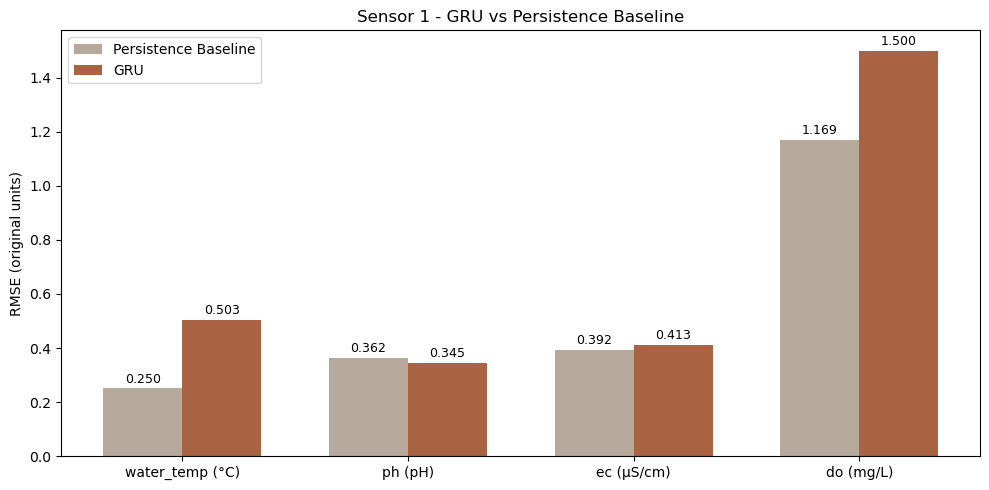


  SENSOR 2 - GRU vs Persistence Baseline
  water_temp: GRU=0.2041, Baseline=0.1867 °C  (-9.4%)
  ph: GRU=0.0891, Baseline=0.0874 pH  (-2.0%)
  ec: GRU=0.1828, Baseline=0.1688 µS/cm  (-8.3%)
  do: GRU=0.1364, Baseline=0.1518 mg/L  (+10.1%)


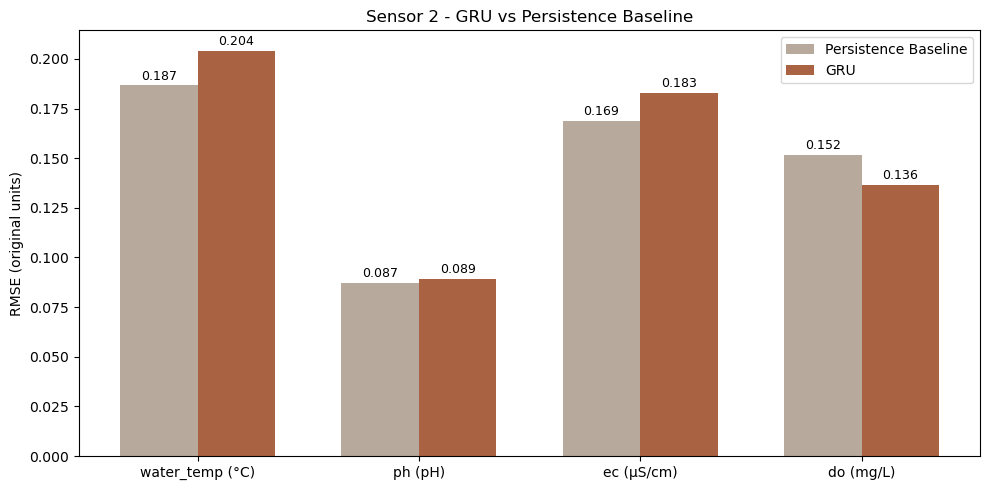

In [294]:
for sensor_id in [1, 2]:
    y_true = sensor_results[sensor_id]['y_true']
    y_pred = sensor_results[sensor_id]['y_pred']
    b_true = sensor_results[sensor_id]['baseline_true']
    b_pred = sensor_results[sensor_id]['baseline_pred']

    print(f"\n{'='*60}")
    print(f"  SENSOR {sensor_id} - GRU vs Persistence Baseline")
    print(f"{'='*60}")

    gru_rmses = []
    base_rmses = []
    for i, feat in enumerate(output_features):
        gru_rmse = np.sqrt(np.nanmean((y_true[:, i] - y_pred[:, i]) ** 2))
        base_rmse = np.sqrt(np.nanmean((b_true[:, i] - b_pred[:, i]) ** 2))
        improvement = (1 - gru_rmse / base_rmse) * 100
        gru_rmses.append(gru_rmse)
        base_rmses.append(base_rmse)
        print(f'  {feat}: GRU={gru_rmse:.4f}, Baseline={base_rmse:.4f} {units[feat]}  ({improvement:+.1f}%)')

    # Bar chart
    x = np.arange(len(output_features))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width/2, base_rmses, width, label='Persistence Baseline', color='#B0A090', alpha=0.9)
    ax.bar(x + width/2, gru_rmses, width, label='GRU', color='#A0522D', alpha=0.9)

    ax.set_ylabel('RMSE (original units)')
    ax.set_title(f'Sensor {sensor_id} - GRU vs Persistence Baseline')
    ax.set_xticks(x)
    ax.set_xticklabels([f'{f} ({units[f]})' for f in output_features])
    ax.legend()

    for j, bar in enumerate(ax.containers):
        ax.bar_label(bar, fmt='%.3f', fontsize=9, padding=2)

    plt.tight_layout()
    plt.savefig(f'../figures/baseline_comparison_sensor{sensor_id}.png', dpi=150, bbox_inches='tight')
    plt.show()

## Zoomed Prediction Window

A 200-row slice of the test set for a closer look at how the GRU tracks signal changes.

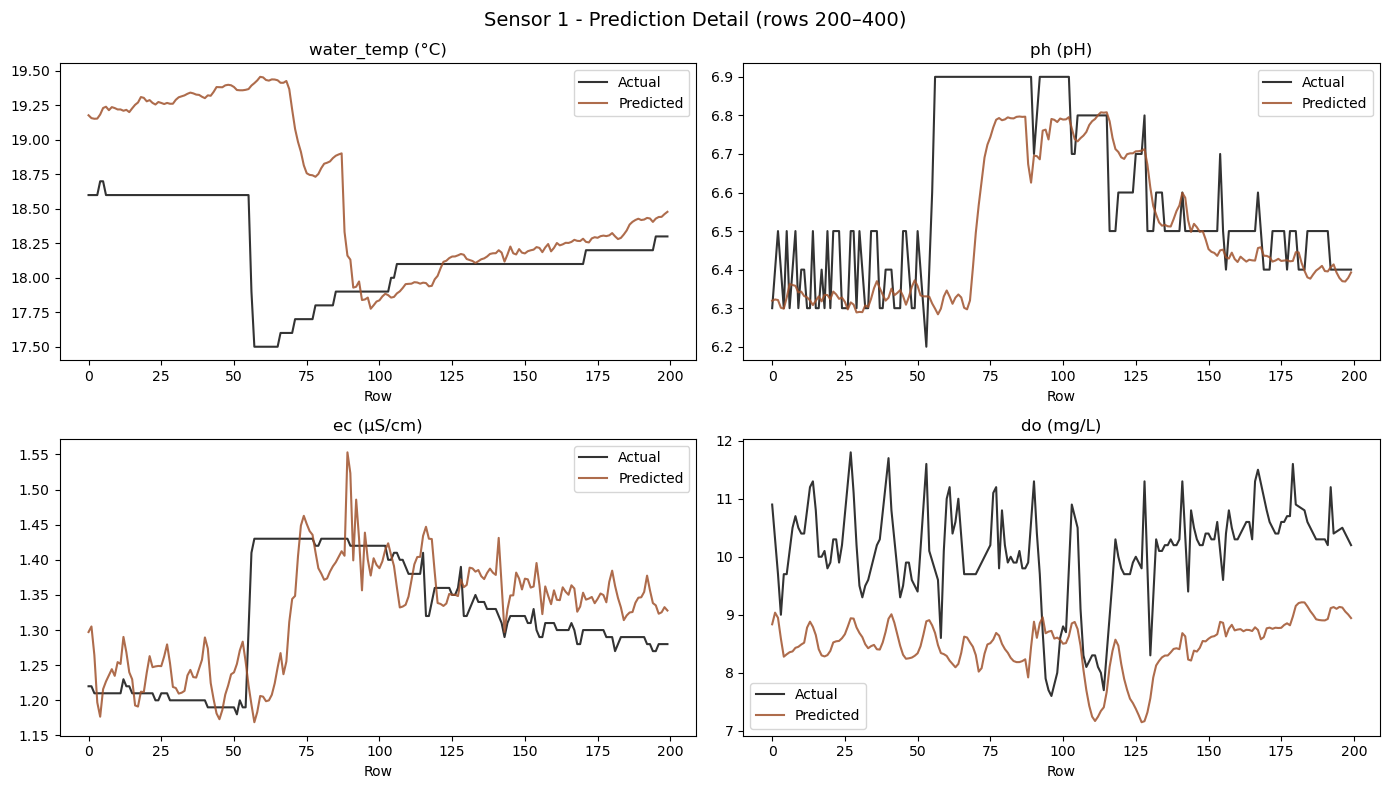

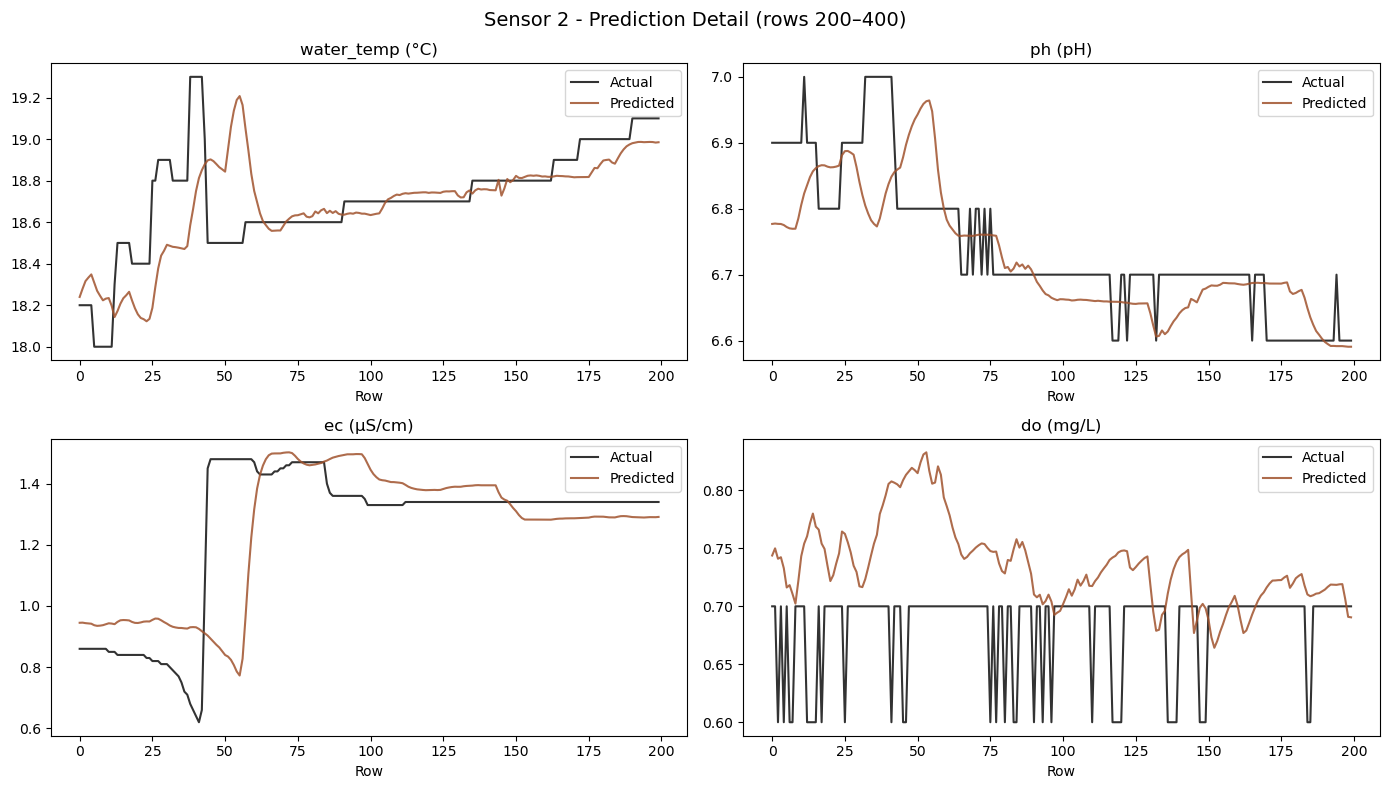

In [295]:
ZOOM_START = 200
ZOOM_LEN = 200
zoom = slice(ZOOM_START, ZOOM_START + ZOOM_LEN)

for sensor_id in [1, 2]:
    y_true = sensor_results[sensor_id]['y_true']
    y_pred = sensor_results[sensor_id]['y_pred']

    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(f'Sensor {sensor_id} - Prediction Detail (rows {ZOOM_START}–{ZOOM_START + ZOOM_LEN})', fontsize=14)

    for i, feat in enumerate(output_features):
        ax = axes.flatten()[i]
        ax.plot(y_true[zoom, i], label='Actual', linewidth=1.5, color='#333333')
        ax.plot(y_pred[zoom, i], label='Predicted', linewidth=1.5, color='#A0522D', alpha=0.85)
        ax.set_title(f'{feat} ({units[feat]})')
        ax.set_xlabel('Row')
        ax.legend()

    plt.tight_layout()
    plt.savefig(f'../figures/zoom_prediction_sensor{sensor_id}.png', dpi=150, bbox_inches='tight')
    plt.show()